# Solution

**Подключение библиотек и скриптов**

In [289]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Пути к директориям и файлам**

In [301]:
MODEL_DATASET_PATH = 'C:\\Users\\User\\Desktop\\py4dataS\\train.csv'
PREDICT_DATASET_PATH = 'C:\\Users\\User\\Desktop\\py4dataS\\test.csv'
PREPARED_DATASET_PATH = 'C:\\Users\\User\\Desktop\\py4dataS\\predictions.csv'

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [302]:
df = pd.read_csv(MODEL_DATASET_PATH)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [243]:
df.shape

(10000, 20)

### Приведение типов данных

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [245]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [246]:
df['Id'].dtype

dtype('int64')

In [303]:
df['Id'] = df['Id'].astype(str)
df['Id'].dtype

dtype('O')

### Обзор целевой переменной

In [248]:
df.Price.describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

### Обзор количественных переменных

In [304]:
df_num_features = df.select_dtypes(include=['float64', 'int64']).drop(['Price'],axis=1)
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4


In [250]:
df_num_features.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [305]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Обзор номинативных переменных

In [306]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Id,Ecology_2,Ecology_3,Shops_2
0,14038,B,B,B
1,15053,B,B,B
2,4765,B,B,B
3,5809,B,B,B
4,10783,B,B,B


In [253]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [254]:
df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [255]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [256]:
df['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [257]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [258]:
df['Shops_2'].unique()

array(['B', 'A'], dtype=object)

### Обработка пропусков

In [259]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [260]:
df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

**LifeSquare**

In [307]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()

**Healthcare_1**

In [308]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

In [309]:
df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

### Обработка выбросов

In [264]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**LifeSquare** Сначала обрабатываем жилую площадь и площадь кухни, там есть очевидные выбросы (огромные нереальные максимумы)

In [310]:
df[df['LifeSquare'] > df['Square'].max()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,900.0,0,0,B,217357.492366


In [311]:
df.loc[4328, "LifeSquare"] = df.loc[4328, "Square"]

**KitchenSquare**

In [312]:
df[df['KitchenSquare'] > df['Square'].max()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,900.0,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [313]:
df.loc[(df['KitchenSquare'] > df['Square'].max()), 'KitchenSquare'] = df['KitchenSquare'].median()

In [314]:
df['KitchenSquare'].median() # среднее значение площади кухни 6 кв.м.

6.0

**Square** (жилая площадь не может быть меньше, чем общая)

In [315]:
df[df['Square'] < df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,900.0,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,900.0,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,900.0,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A,131797.472284
178,2416,57,1.0,29.298168,29.770784,5.0,7,5.0,1964,0.133215,B,B,49,11395,3,1406.0,3,4,A,148991.265200
184,3398,74,1.0,48.743665,51.011232,1.0,12,20.0,2017,0.075779,B,B,6,1437,3,900.0,0,2,B,165071.825722
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
217,5540,27,3.0,57.643613,59.425078,9.0,16,10.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,198351.892455
234,12633,27,3.0,81.867166,81.884548,0.0,12,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,182228.520030


In [316]:
df.loc[((df['Square'] - df['LifeSquare']) < -5) == True] 
# если разница меньше 5м, скорее всего, ошибка ввода, более - скорее всего, поменяли местами жилую и общую площадь

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
501,15923,27,1.0,26.553188,32.781260,0.0,25,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,114256.236153
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,900.0,0,2,B,141780.231857
900,8940,34,1.0,26.811587,32.781260,0.0,18,0.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,175399.643453
1184,3902,23,1.0,27.442238,32.781260,1.0,4,4.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,65547.071846
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,900.0,0,1,B,97560.720383
3954,5210,27,1.0,27.245731,32.781260,1.0,8,16.0,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,74982.605917
4638,4071,6,3.0,75.203314,82.486992,1.0,13,25.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,211324.917957
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,900.0,0,1,B,104891.073757
6945,12927,62,2.0,17.414181,32.781260,1.0,4,20.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,180750.471749


In [317]:
df.loc[((df['Square'] - df['LifeSquare']) < -5) == True, 'LifeSquare'] = df['Square']

In [273]:
df.describe() # остался минимум жилой площади, пока оставляю, смотрю общую

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,35.430193,5.876100,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,17.365837,5.174014,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,25.491704,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,41.417409,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [274]:
df[(df['Square'] < 7)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,5.497061,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,4.380726,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,900.0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,4.823679,0.0,6,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,237716.681261
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,458378.777006


In [318]:
df.loc[212, "Square"] = df.loc[212, "LifeSquare"]
df.loc[3280, "Square"] = df.loc[3280, "LifeSquare"]
df.loc[8030, "Square"] = df.loc[8030, "LifeSquare"]
df.loc[df['Square'] < 7, 'Square'] = df['Square'].median()

In [319]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.374350,35.430193,5.876100,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.839512,20.979981,17.365837,5.174014,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,0.000000,13.784865,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.794392,25.491704,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513580,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,41.417409,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**district**

In [320]:
df[(df['DistrictId'] <= 0)] 
# поскольку Social и Healthcare отчасти совпадают для района с индексом 0, но есть и отличающиеся, скорее всего, часть 
# значений относятся к другому району. Выберем:

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
20,8862,0,3.0,103.605292,47.799426,10.0,12,17.0,2002,0.319809,B,B,25,4756,16,2857.0,5,8,B,521919.057400
636,14492,0,2.0,62.962156,37.043238,10.0,10,22.0,2007,0.319809,B,B,25,4756,16,2857.0,5,8,B,334328.590220
745,9982,0,3.0,89.636583,49.965887,10.0,1,17.0,2009,0.006076,B,B,30,5285,0,645.0,6,6,B,184968.357821
1188,9302,0,1.0,36.158717,24.286117,5.0,2,5.0,1963,0.319809,B,B,25,4756,16,2857.0,5,8,B,147258.736617
1539,3808,0,3.0,76.585035,52.310864,8.0,4,8.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,339228.823764
1552,2039,0,1.0,30.945973,18.966367,5.0,5,5.0,1974,0.319809,B,B,25,4756,16,2857.0,5,8,B,160762.929303
1572,12558,0,2.0,49.335217,31.511632,5.0,4,5.0,1964,0.319809,B,B,25,4756,16,2857.0,5,8,B,173146.323968
1653,7586,0,2.0,45.662268,30.086910,6.0,4,5.0,1959,0.319809,B,B,25,4756,16,2857.0,5,8,B,221660.251771
1841,5690,0,2.0,44.643505,31.477777,5.0,3,5.0,1964,0.319809,B,B,25,4756,16,2857.0,5,8,B,167238.283328
1891,13685,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,B,B,25,4756,16,2857.0,5,8,B,88871.750230


In [233]:
df.loc[(df['DistrictId'] <= 0) & (df['Social_3'] != 16)] 
# оставшиеся значения тоже одинаковые, возможно, части района, пока оставлю как есть

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
745,9982,0,3.0,89.636583,49.965887,10.0,1,17.0,2009,0.006076,B,B,30,5285,0,645.0,6,6,B,184968.357821
2444,6438,0,1.0,52.792256,51.156269,10.0,9,17.0,2017,0.006076,B,B,30,5285,0,645.0,6,6,B,155726.755440
3376,11008,0,1.0,46.934108,18.866829,10.0,16,17.0,2010,0.006076,B,B,30,5285,0,645.0,6,6,B,85770.442001
4059,11175,0,3.0,92.298723,51.617940,13.0,5,19.0,2012,0.006076,B,B,30,5285,0,645.0,6,6,B,285934.201118
4374,15643,0,2.0,77.331038,39.500077,11.0,8,12.0,2014,0.006076,B,B,30,5285,0,645.0,6,6,B,237878.326701
4994,2354,0,1.0,41.295308,19.297874,10.0,7,19.0,2013,0.006076,B,B,30,5285,0,645.0,6,6,B,106150.116201
5975,3257,0,2.0,71.259922,40.824190,11.0,1,19.0,2013,0.006076,B,B,30,5285,0,645.0,6,6,B,169460.752661
6609,13491,0,1.0,38.178277,0.370619,0.0,19,17.0,2016,0.006076,B,B,30,5285,0,645.0,6,6,B,105134.286994
6662,14295,0,1.0,46.556292,21.118280,10.0,8,19.0,2012,0.006076,B,B,30,5285,0,645.0,6,6,B,92018.721964
7916,5544,0,1.0,52.653623,32.781260,1.0,5,15.0,2016,0.006076,B,B,30,5285,0,645.0,6,6,B,188810.508549


### Интерквартиальный размах

In [277]:
df.Square.describe()

count    10000.000000
mean        56.374350
std         20.979981
min         13.784865
25%         41.794392
50%         52.513580
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [321]:
IQ=df.Square.describe()['75%']-df.Square.describe()['25%']
low_border=df.Square.describe()['25%']-IQ*1.5
high_border=df.Square.describe()['75%']+IQ*1.5

In [322]:
print(IQ,low_border,high_border)

24.10623336272033 5.635041838855983 102.05997528973731


In [323]:
df[(df['Square']<low_border)|(df['Square']>high_border)]  
# значений площади, выходящих за интерквартильный размах, достаточно много, но скорее всего, это не выбросы, 
# а мало больших квартир

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
19,4909,19,3.0,110.959792,56.996765,11.0,16,25.0,2012,0.000991,B,B,33,6783,3,900.0,1,9,B,394895.325987
20,8862,0,3.0,103.605292,47.799426,10.0,12,17.0,2002,0.319809,B,B,25,4756,16,2857.0,5,8,B,521919.057400
23,6641,54,3.0,118.907612,32.781260,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
86,9613,148,3.0,127.481583,32.781260,1.0,16,1.0,2012,0.313925,B,B,22,4625,11,3855.0,2,10,B,510700.444735
132,3428,108,3.0,110.203969,59.270702,12.0,19,28.0,2007,0.019509,B,B,37,7687,11,176.0,5,5,B,146061.730565
343,716,113,3.0,125.287183,127.477137,19.0,26,24.0,2017,0.050756,B,B,24,5469,1,145.0,0,1,B,522197.035995
358,6006,62,3.0,121.844004,122.497641,1.0,3,3.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,193847.642016
386,13818,7,3.0,115.254741,56.404018,19.0,16,17.0,2012,0.035145,B,B,42,9292,3,2620.0,0,3,B,565355.938997


### Отбор и построение новых признаков

**Преобразуем категориальные признаки в несколько бинарных**

In [324]:
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
df = df.rename(columns = {'A':'Ecology_2_A', 'B': 'Ecology_2_B'})
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df = df.rename(columns = {'A':'Ecology_3_A', 'B': 'Ecology_3_B'})
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
df = df.rename(columns = {'A':'Shops_2_A', 'B': 'Shops_2_B'})

In [325]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,0,1,0,1,0,1


In [295]:
#df.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1, inplace=True)

In [296]:
#df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,900.0,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,150226.531644,0,1,0,1,0,1


**Анализ целевой переменной**

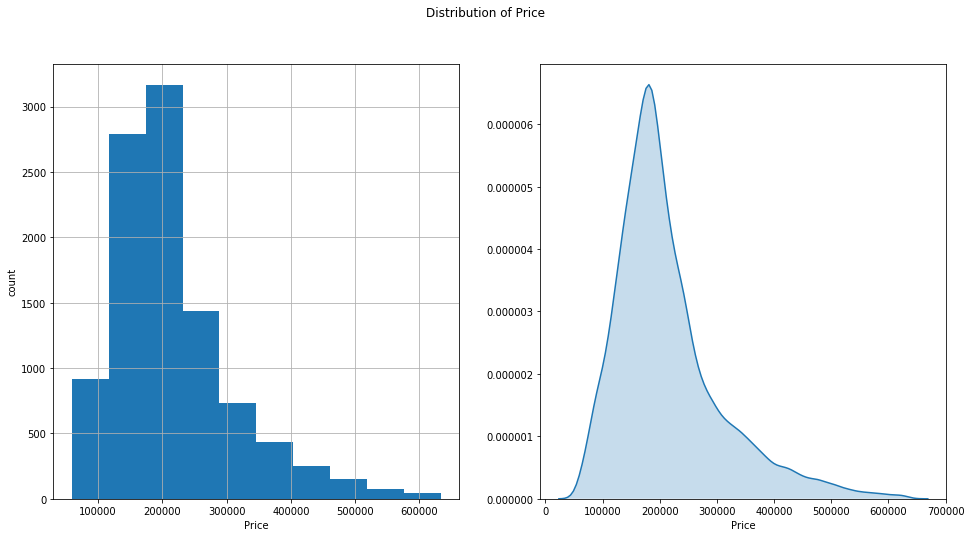

In [326]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [327]:
target_mean = round(df['Price'].mean(), 2)
target_median = round(df['Price'].median(), 2)
target_mode = round(df['Price'].mode()[0], 2)

target_mean, target_median, target_mode

(214138.86, 192269.64, 59174.78)

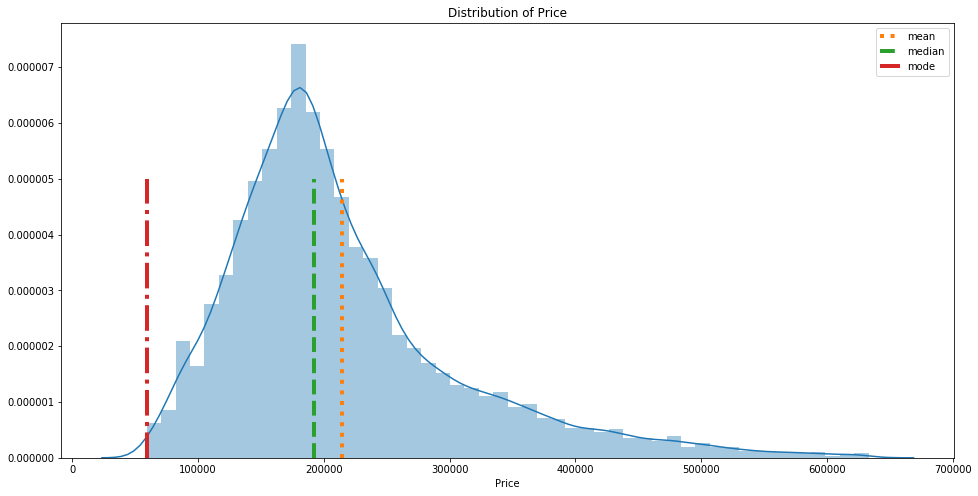

In [328]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean]*100 , y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median]*100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode]*100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

**Оценка распредения целевой переменной в разрезе других признаков**

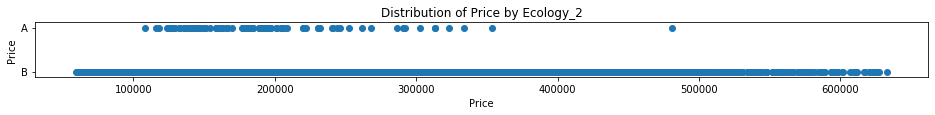

In [332]:
plt.figure(figsize=(16, 1))

plt.scatter(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Price')
plt.title('Distribution of Price by Ecology_2')
plt.show() # А - более низкая цена. В - практически не влияет на цену

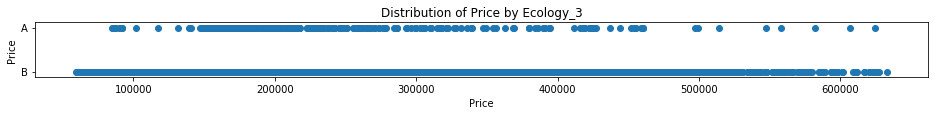

In [333]:
plt.figure(figsize=(16, 1))

plt.scatter(df['Price'], df['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Price')
plt.title('Distribution of Price by Ecology_3')
plt.show()

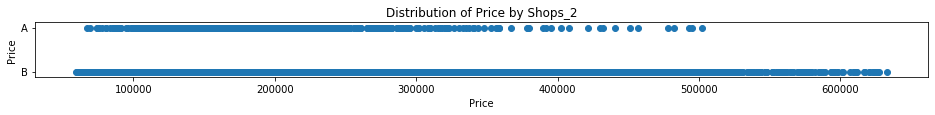

In [334]:
plt.figure(figsize=(16, 1))

plt.scatter(df['Price'], df['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Price')
plt.title('Distribution of Price by Shops_2')
plt.show() # А - более низкая цена. В - практически не влияет на цену

**Box plot**

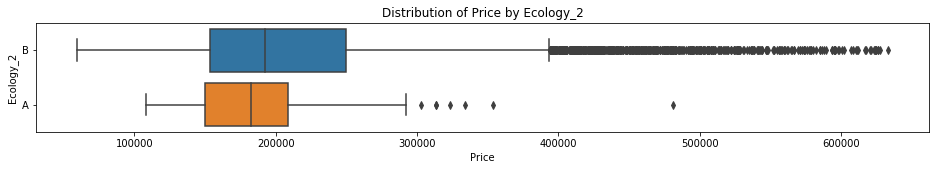

In [339]:
plt.figure(figsize=(16, 2))

sns.boxplot(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

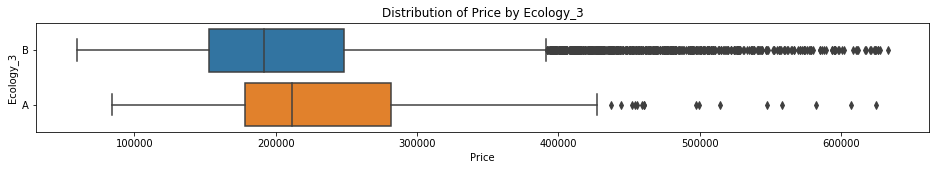

In [340]:
plt.figure(figsize=(16, 2))

sns.boxplot(df['Price'], df['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Distribution of Price by Ecology_3')
plt.show()

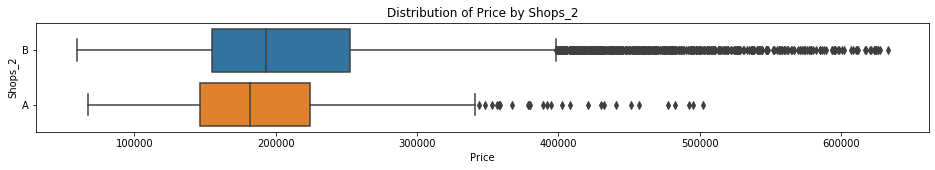

In [341]:
plt.figure(figsize=(16, 2))

sns.boxplot(df['Price'], df['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Distribution of Price by Shops_2')
plt.show() # распределение Ecology_2 и Shops_2 очень похоже

**Violin plot**

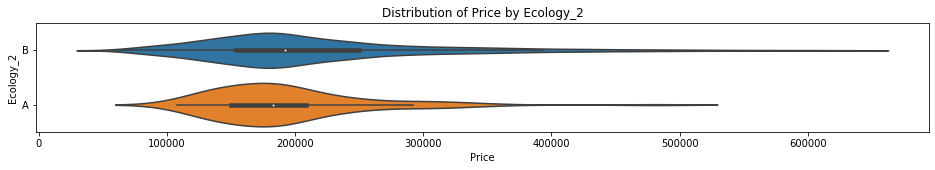

In [342]:
plt.figure(figsize=(16, 2))

sns.violinplot(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

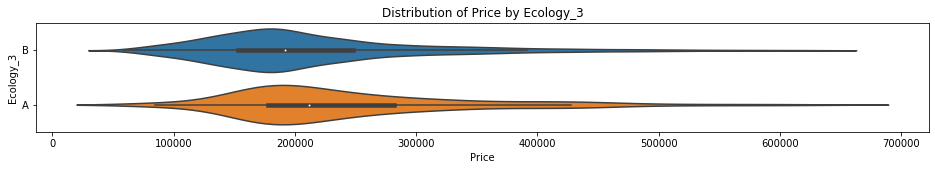

In [343]:
plt.figure(figsize=(16, 2))

sns.violinplot(df['Price'], df['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Distribution of Price by Ecology_3')
plt.show()

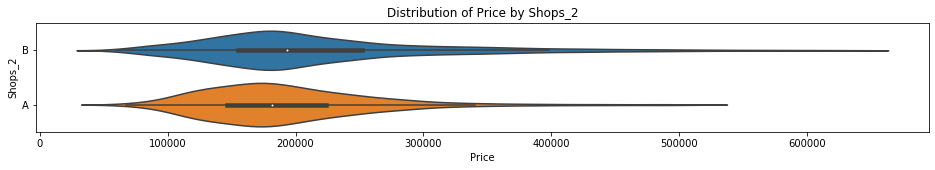

In [344]:
plt.figure(figsize=(16, 2))

sns.violinplot(df['Price'], df['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Distribution of Price by Shops_2')
plt.show()

### Анализ признаков

**Количественные признаки**

In [368]:
df['DistrictId'] = df['DistrictId'].astype('float64')
df['Floor'] = df['Floor'].astype('float64')
df['HouseYear'] = df['HouseYear'].astype('float64')
df['Social_1'] = df['Social_1'].astype('float64')
df['Social_2'] = df['Social_2'].astype('float64')
df['Social_3'] = df['Social_3'].astype('float64')
df['Helthcare_2'] = df['Helthcare_2'].astype('float64')
df['Shops_1'] = df['Shops_1'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
Id               10000 non-null object
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null object
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      100

In [369]:
df_num_features = df.select_dtypes(include='float64')

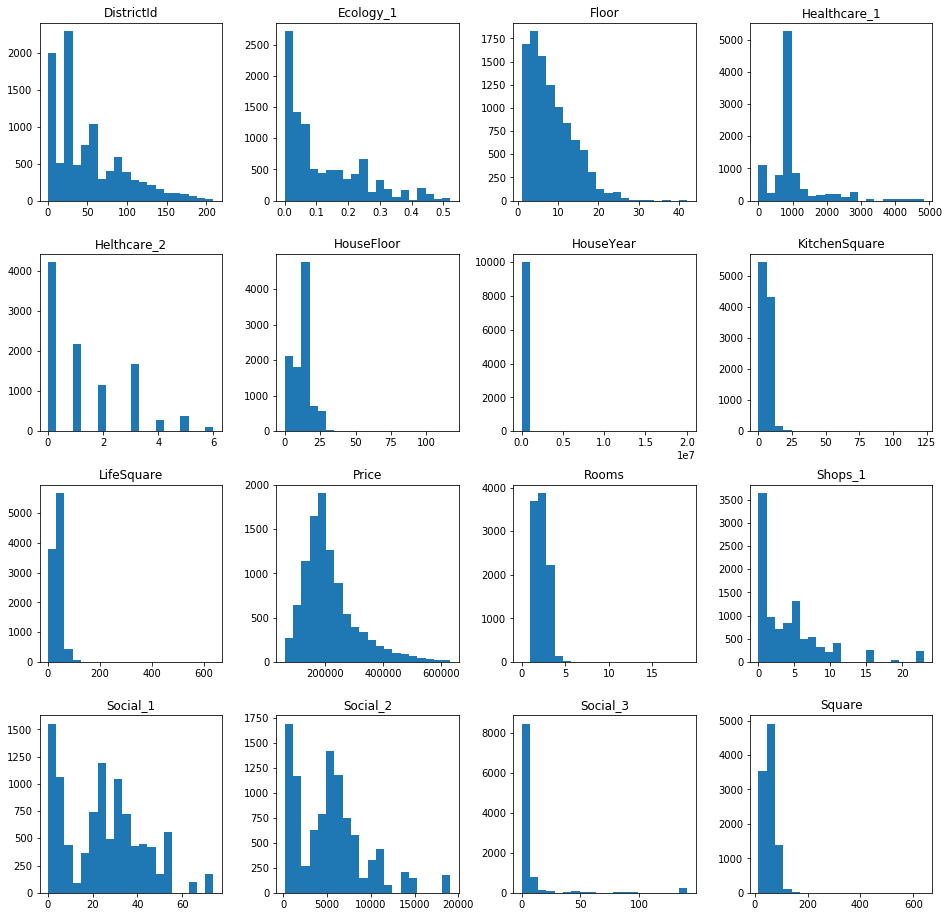

In [370]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

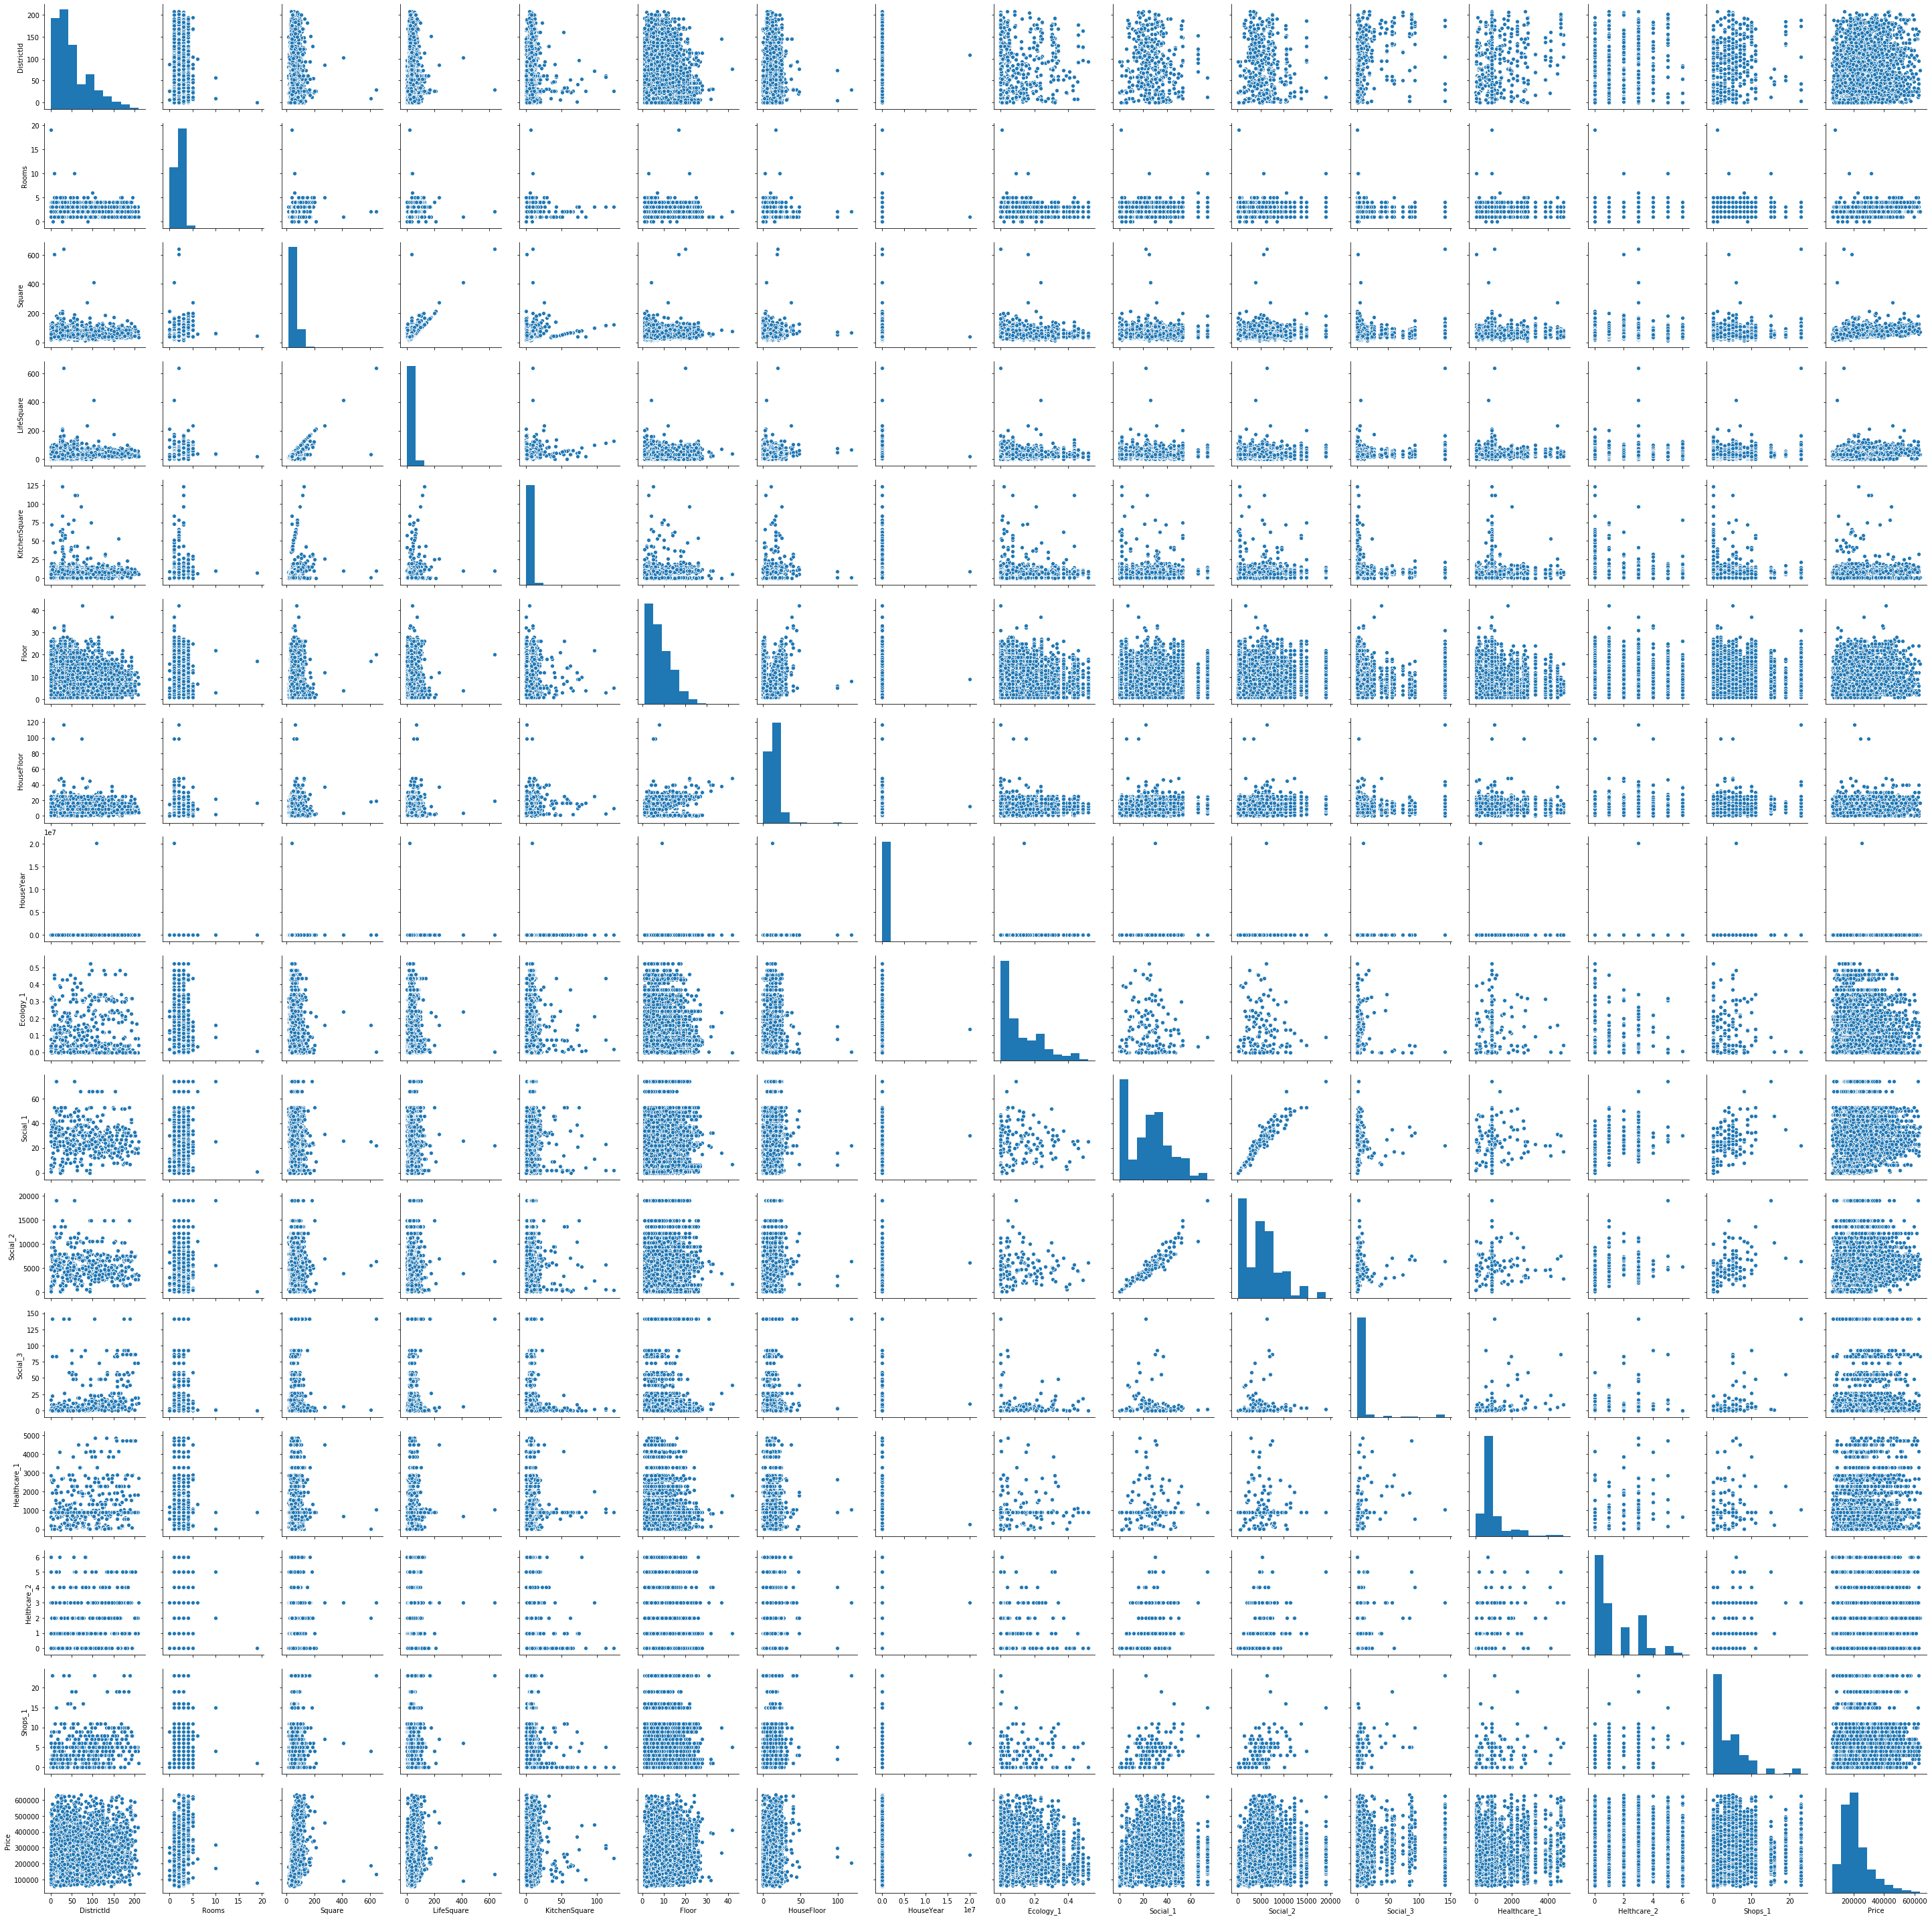

In [371]:
sns.pairplot(df_num_features);

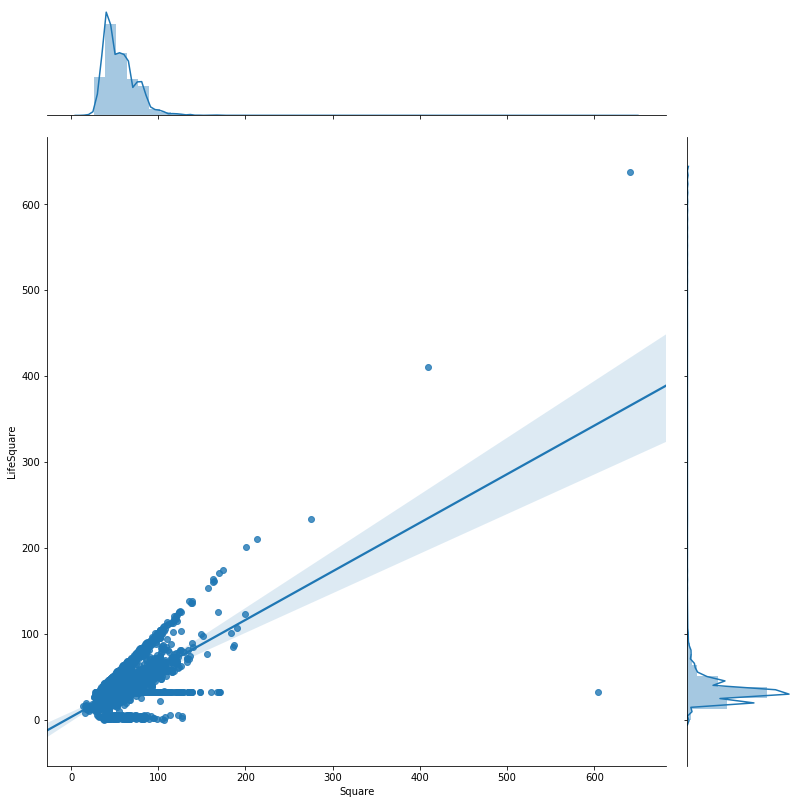

In [372]:
grid = sns.jointplot(df['Square'], df['LifeSquare'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

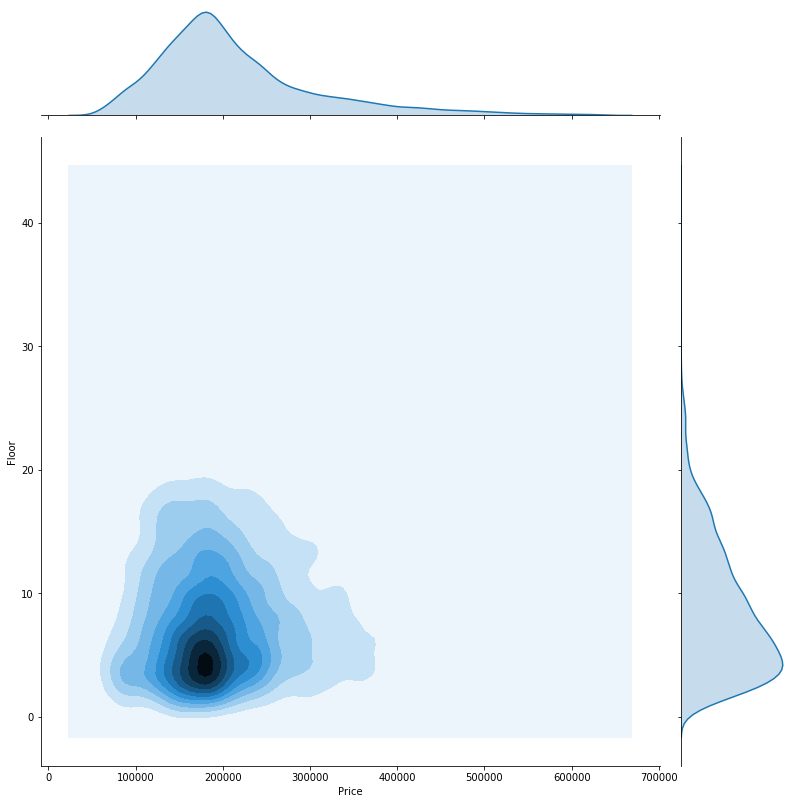

In [374]:
grid = sns.jointplot(df['Price'], df['Floor'], kind='kde')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Бинарные признаки**

In [375]:
df_bin_features = df.select_dtypes(include='uint8')

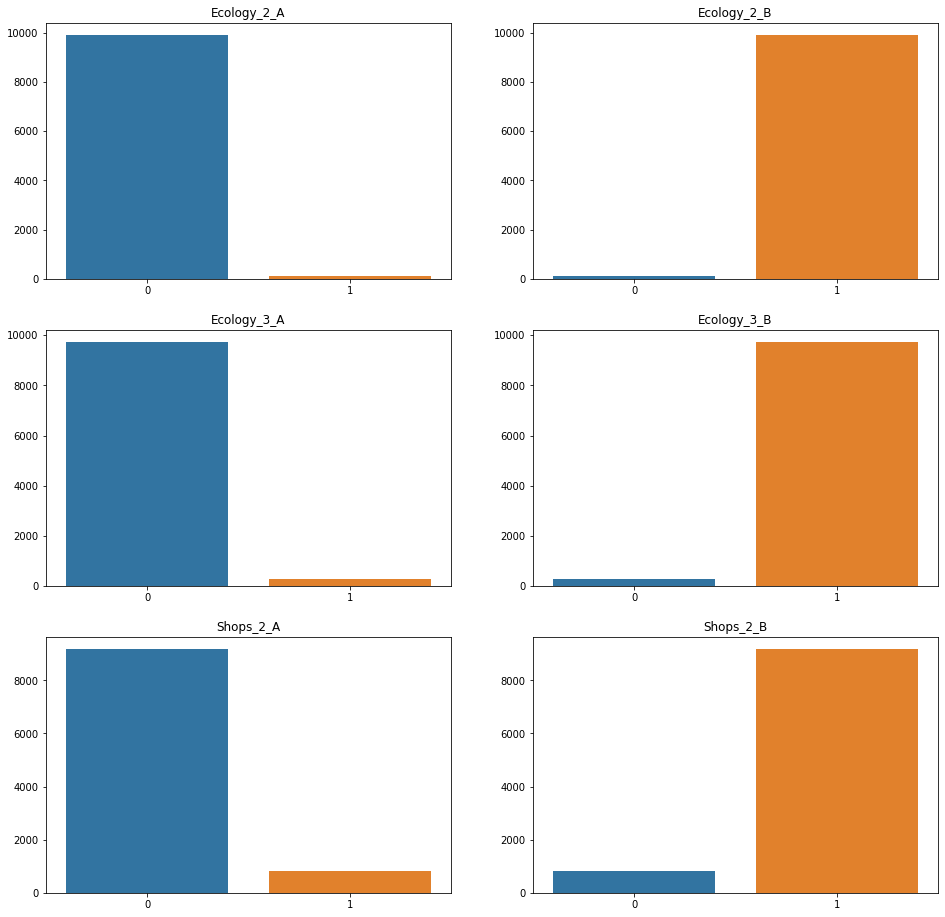

In [376]:
plt.figure(figsize = (16,16))

for i, colname in enumerate(df_bin_features.columns):
    counts = df_bin_features[colname].value_counts()
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)
    
plt.show()

### Матрица корреляций

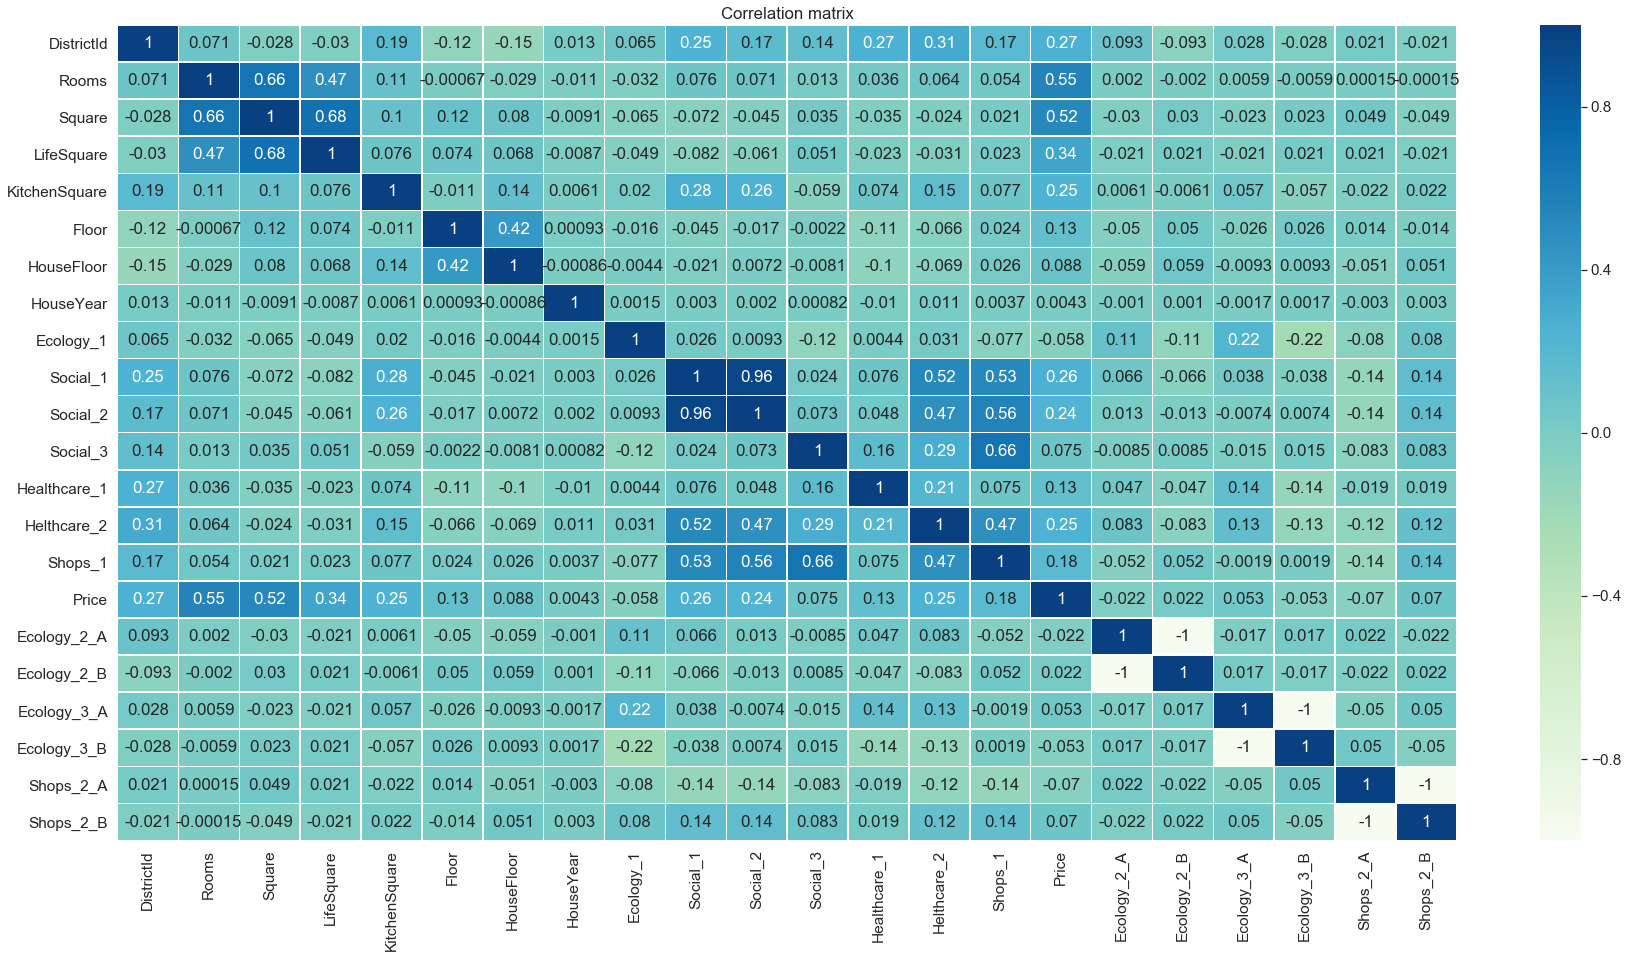

In [378]:
plt.figure(figsize = (30,15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [379]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')